# Project Title: PRCL-0019 - Sales Effectiveness Prediction

**BUSINESS CASE**:-
* FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.
* Based on the given feature of dataset we need to predict the prospective Lead category, distinguishing between 'High Potential' and 'Low Potential' Customers.

### Task:-

* Data exploration insights – Sales effectiveness.
* ML model to predict the Lead Category (High Potential , Low Potential)

## Features

1. **Created (Obj)** :  The timestamp when the sales entry was recorded.
2. **Product_ID (Float)** :  The unique identifier for each product.
3. **Source (Obj)** :  The platform where the sale was generated (e.g., Website).
4. **Mobile (Obj)** :  The mobile number of the customer.
5. **EMAIL (Obj)** :  The email address of the customer.
6. **Sales_Agent (Obj)** :  The agent responsible for the sale.
7. **Location (Obj)** :  The geographic location of the customer.
8. **Delivery_Mode (Obj)** :  The method used for product delivery.
9. **Status (Obj)** :  The status of the sale (e.g., "Open").
10. **Dataset consist of 7422 rows and 9 columns.** 

### Importing dependencies

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

### Loading data 

In [67]:
data=pd.read_csv('Project_sales_data.csv')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [68]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [69]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [70]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [71]:
data.dtypes

Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

In [72]:
data.shape

(7422, 9)

In [73]:
data.describe(include='object')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


In [74]:
type(data)

pandas.core.frame.DataFrame

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [76]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [77]:
data['Status'].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

## EDA

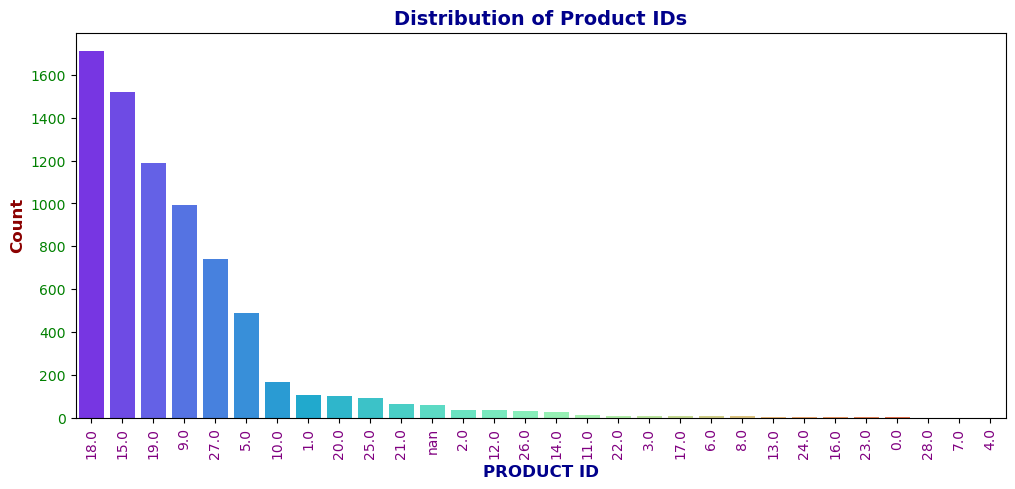

In [79]:
plt.figure(figsize=(12, 5))
sns.countplot(x=data['Product_ID'].astype(str), 
              order=data['Product_ID'].astype(str).value_counts().index, 
              palette="rainbow")
plt.xlabel('PRODUCT ID', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=90, fontsize=10, color='purple')
plt.yticks(fontsize=10, color='green')
plt.title('Distribution of Product IDs', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

### $INSIGHTS$
**In the sales dataset, product IDs 18, 15, 19, 9, 27, and 5 have recorded the highest sales volumes, while the remaining product IDs have lower sales figures by comparison.**

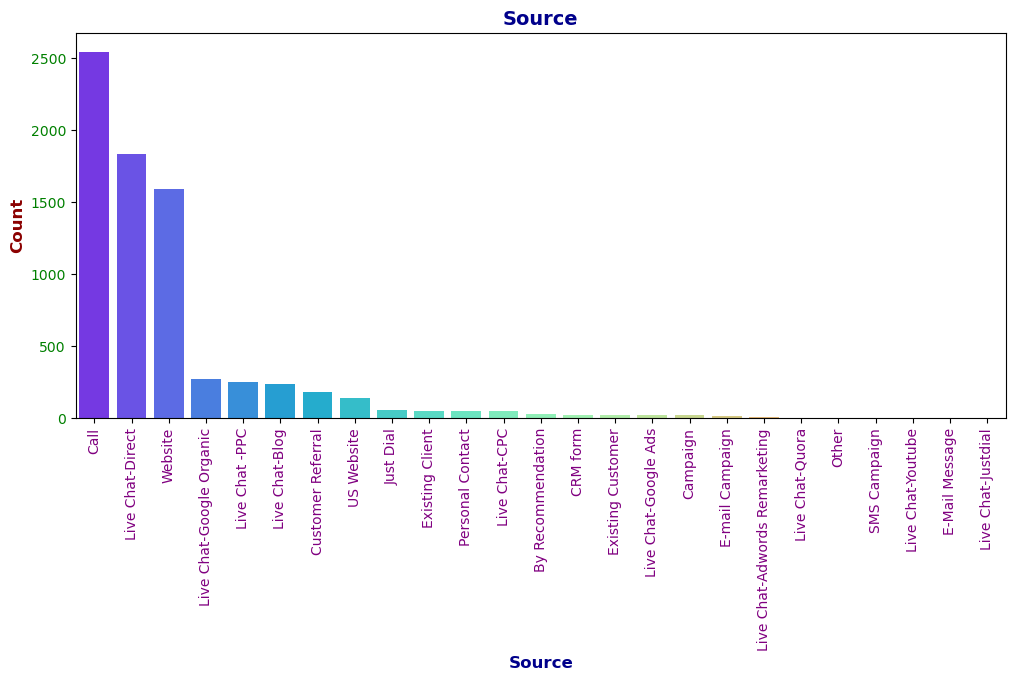

In [81]:
plt.figure(figsize=(12, 5))
sns.countplot(x=data['Source'], order=data['Source'].value_counts().index, palette="rainbow")
plt.xlabel('Source', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=90, fontsize=10, color='purple')
plt.yticks(fontsize=10, color='green')
plt.title('Source', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

### $INSIGHTS$
**Here CALL, LIVE CHAT-DIRECT, WEBSITE shows majority of sales than the remaining Sources.**

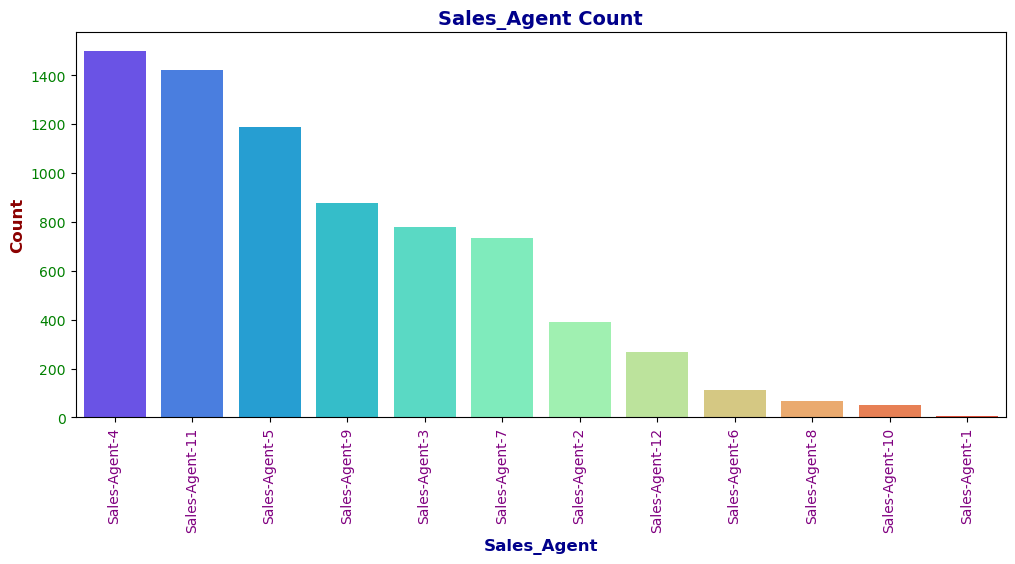

In [83]:
plt.figure(figsize=(12, 5))
sns.countplot(x=data['Sales_Agent'], order=data['Sales_Agent'].value_counts().index, palette="rainbow")
plt.xlabel('Sales_Agent', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=90, fontsize=10, color='purple')
plt.yticks(fontsize=10, color='green')
plt.title('Sales_Agent Count', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

### $INSIGHTS$
**Sales-Agent 4,11,5,9,3,7 has done more sales than others**

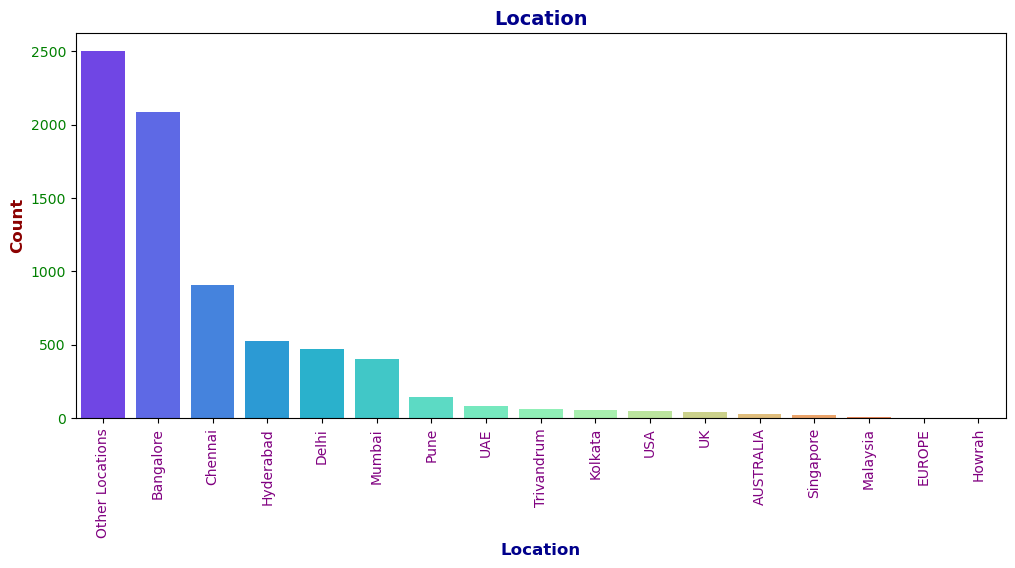

In [85]:
plt.figure(figsize=(12, 5))
sns.countplot(x=data['Location'], order=data['Location'].value_counts().index, palette="rainbow")
plt.xlabel('Location', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=90, fontsize=10, color='purple')
plt.yticks(fontsize=10, color='green')
plt.title('Location', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

### $INSIGHTS$
* **Bangalore and Other location exhibit higher sales than other Locations.**
* **Chennai, Hyderabad, Delhi, Mumbai contributes good sales than other regions except Bangalore and Other Locations.**

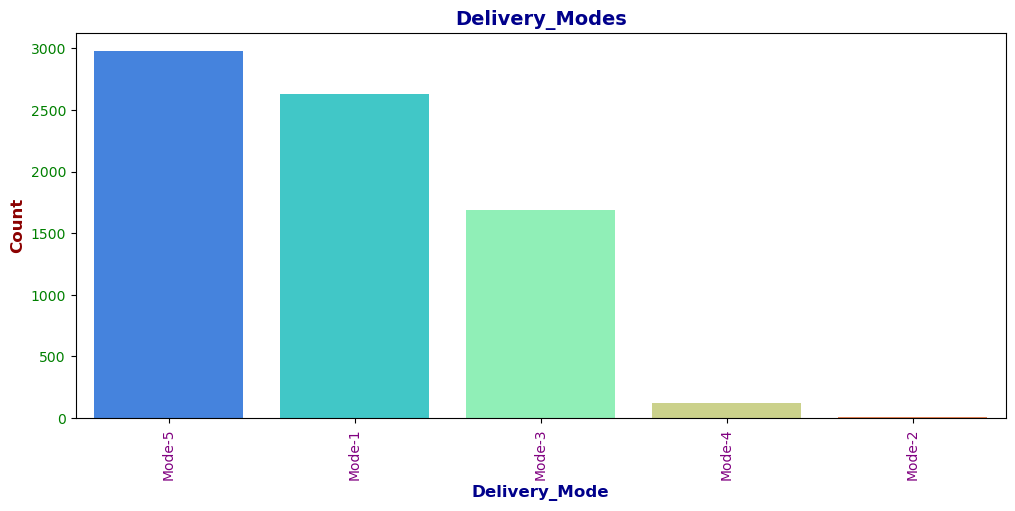

In [87]:
plt.figure(figsize=(12, 5))
sns.countplot(x=data['Delivery_Mode'], order=data['Delivery_Mode'].value_counts().index, palette="rainbow")
plt.xlabel('Delivery_Mode', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=90, fontsize=10, color='purple')
plt.yticks(fontsize=10, color='green')
plt.title('Delivery_Modes', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

### $INSIGHTS$
**Modes 5,1,3 have comparitively larger sales than modes 4,2.**

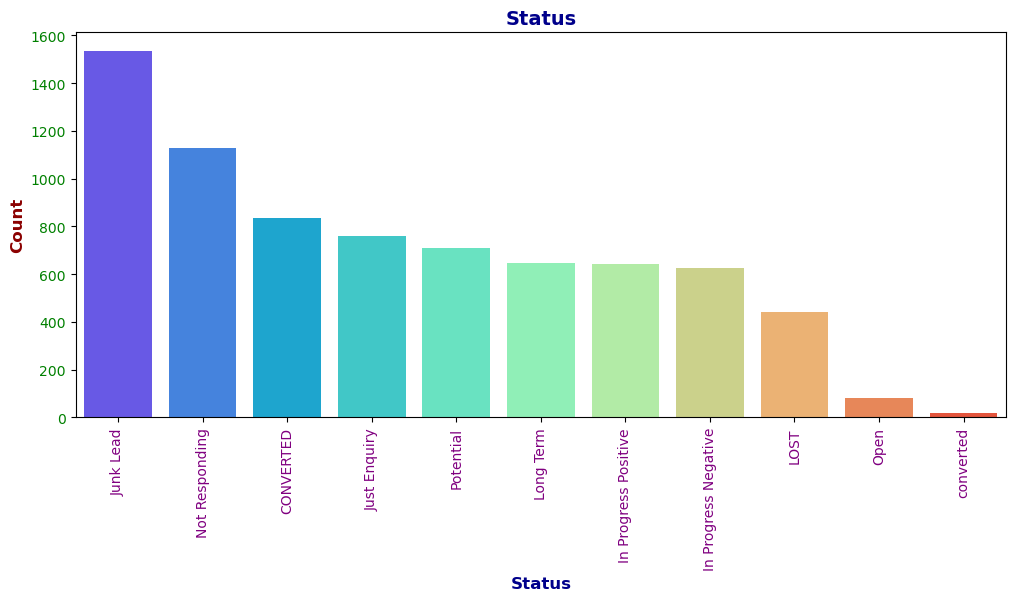

In [89]:
plt.figure(figsize=(12, 5))
sns.countplot(x=data['Status'], order=data['Status'].value_counts().index, palette="rainbow")
plt.xlabel('Status', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=90, fontsize=10, color='purple')
plt.yticks(fontsize=10, color='green')
plt.title('Status', fontsize=14, fontweight='bold', color='darkblue')
plt.show()

### $INSIGHTS$
* **Junk lead appears to have a high sales.**
* **Others have comparably good sales.**

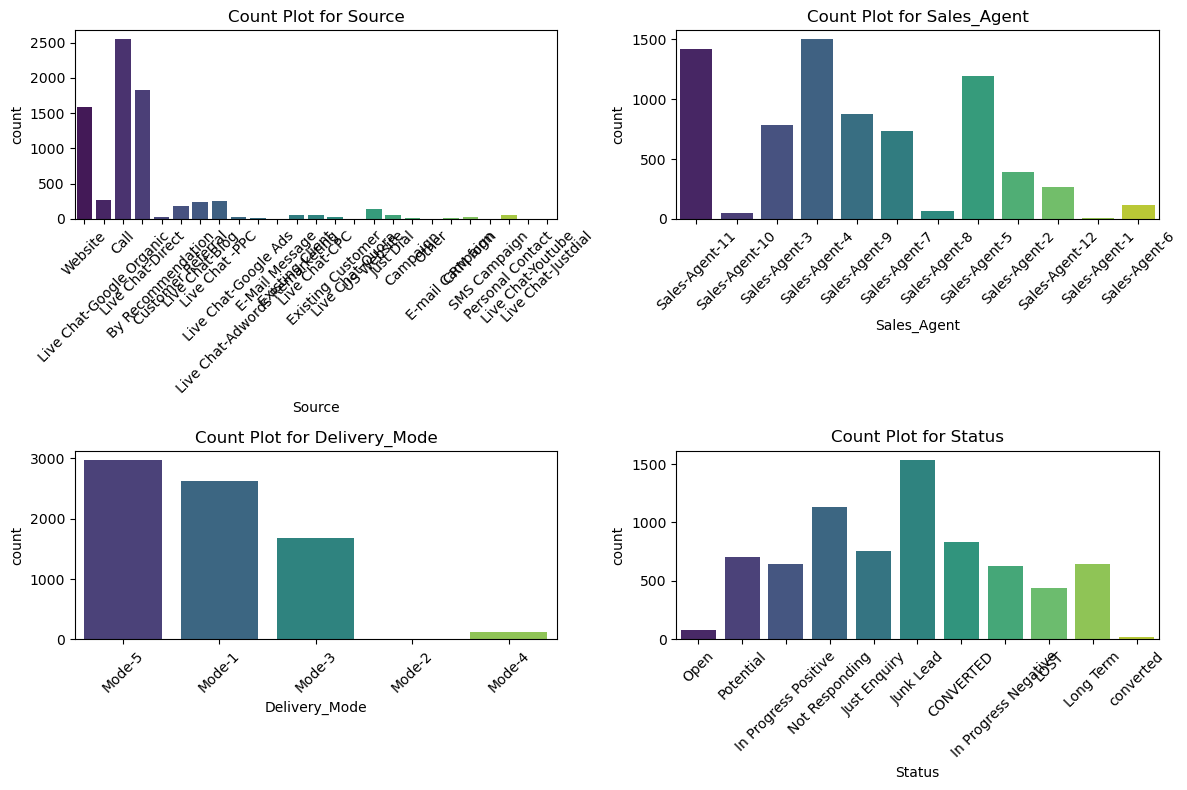

In [91]:
categorical_cols = ["Source", "Sales_Agent", "Delivery_Mode", "Status"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Count Plot for {col}")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [93]:
# converted and CONVERTED are same so they can be merged
data['Status']=data['Status'].replace({'converted':'CONVERTED'})
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [94]:
data['Status'].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                852
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
Name: count, dtype: int64

* **Junk Lead**  – Leads that are not relevant, fake, or unqualified for the sales process.
* **Not Responding**  – Potential customers who have been contacted but are not replying.
* **CONVERTED**  – Successful leads that have turned into customers.
* **Just Enquiry**  – Leads that have shown interest but haven’t progressed further.
* **Potential**  – Leads that are considered promising but are not yet converted.
* **Long Term** – Leads that may convert in the future but require nurturing over a longer period.
* **In Progress Positive**  – Active leads with a high chance of conversion.
* **In Progress Negative**  – Active leads but with a low chance of conversion.
* **LOST**  – Leads that were pursued but did not convert.
* **Open** – Likely represents leads that are still being worked on and have not yet been classified.

Categorizing the status of sales to high and low in potential lead to get a target column

In [97]:
high_pot=['CONVERTED','Potential','In Progress Positive']
low_pot=['Junk Lead','Not Responding','Just Enquiry','Long Term','In Progress Negative','LOST','Open']
data['Lead']=data['Status'].apply(lambda x:'High' if x in high_pot else 'Low')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Lead
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,Low
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,Low
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,Low
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,Low
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,Low
...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,Low
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,Low
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,Low
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,Low


In [98]:
data['Lead'].value_counts()

Lead
Low     5219
High    2203
Name: count, dtype: int64

In [99]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
Lead                0
dtype: int64

In [100]:
data['Product_ID'].value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [101]:
data['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

* **Call**	-- Lead came from a phone call inquiry.
* **Website** -- Lead was generated from the company’s website.
* **Live Chat-Direct**	-- Lead interacted via live chat on the website.
* **Live Chat-Google Organic**	-- Lead came through live chat after finding the site via Google search.
* **Live Chat - PPC**	-- Lead came from a Pay-Per-Click (PPC) advertisement.
* **Live Chat-Blog**	-- Lead interacted via chat after reading a blog post.
* **Customer Referral**	-- Lead was referred by an existing customer.
* **US Website**	-- Lead came from a US-based version of the website.
* **Just Dial** -- Lead found the business via Just Dial (a local business listing service).
* **Existing Client**	-- The lead is an existing customer inquiring about another product/service.
* **Personal Contact**	-- Lead was generated from direct personal connections.
* **Live Chat-CPC**	-- Lead interacted via chat after clicking on a Cost-Per-Click (CPC) ad.
* **By Recommendation**	-- Lead came from a recommendation (word of mouth).
* **CRM Form**	-- Lead filled out a contact form in the Customer Relationship Management (CRM) system.
* **Campaign**	-- Lead came from a marketing campaign (email, social media, etc.).
* **E-mail Campaign**	-- Lead was generated from an email marketing campaign.
* **Live Chat-AdWords Remarketing**	-- Lead interacted via live chat after clicking on a Google AdWords retargeting ad.
* **Live Chat-Quora**	-- Lead found the business via Quora and interacted through chat.
* **Other**	-- Miscellaneous sources that don’t fit into the above categories.
* **SMS Campaign**	-- Lead came from an SMS marketing campaign.
* **Live Chat-Youtube**	-- Lead interacted via live chat after watching a YouTube ad.
* **E-Mail Message**	-- Lead reached out through direct email communication.
* **Live Chat-Justdial**	-- Lead interacted via live chat after finding the business on Just Dial.

In [103]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [104]:
data['EMAIL'].value_counts()

EMAIL
#VALUE!               1701
sXXXXXXX@gmail.com     781
aXXXXXXX@gmail.com     445
rXXXXXXX@gmail.com     342
mXXXXXXX@gmail.com     305
                      ... 
dXXXXXXXwal@bt.com       1
uXXXXXXXectric.com       1
dXXXXXXX9@gmail.co       1
pXXXXXXXamaris.com       1
mXXXXXXXengira.com       1
Name: count, Length: 883, dtype: int64

In [105]:
data['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [106]:
data['Created'].value_counts()

Created
26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 12:52    1
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
28-04-2018 07:54    1
Name: count, Length: 6752, dtype: int64

In [107]:
data['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [108]:
data['Status'].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                852
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
Name: count, dtype: int64

In [109]:
pd.reset_option("display.max_rows")

In [110]:
#pd.set_option('display.max_rows', None)
data['Mobile'].value_counts()

Mobile
XXXXXXX       222
988XXXXXXX    211
984XXXXXXX    177
998XXXXXXX    125
994XXXXXXX    112
             ... 
747XXXXXXX      1
124XXXXXXX      1
031XXXXXXX      1
(31XXXXXXX      1
9535207621      1
Name: count, Length: 486, dtype: int64

In [111]:
data['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [112]:
missing_pid_rows = data[data['Product_ID'].isnull()]
print(missing_pid_rows)

               Created  Product_ID            Source      Mobile  \
0     14-11-2018 10:05         NaN           Website  984XXXXXXX   
1     14-11-2018 09:22         NaN           Website     XXXXXXX   
2     14-11-2018 09:21         NaN           Website     XXXXXXX   
3     14-11-2018 08:46         NaN           Website     XXXXXXX   
4     14-11-2018 07:34         NaN           Website     XXXXXXX   
5     14-11-2018 07:33         NaN           Website     XXXXXXX   
6     14-11-2018 05:58         NaN           Website     XXXXXXX   
7     14-11-2018 05:49         NaN           Website     XXXXXXX   
8     14-11-2018 05:40         NaN           Website  078XXXXXXX   
9     14-11-2018 05:06         NaN           Website     XXXXXXX   
10    14-11-2018 05:03         NaN           Website     XXXXXXX   
11    14-11-2018 04:52         NaN           Website     XXXXXXX   
12    14-11-2018 02:37         NaN           Website  467XXXXXXX   
13    13-11-2018 23:40         NaN              

In [113]:
# Drop rows where Product_ID is missing
data1 = data.dropna(subset=['Product_ID'])
data1

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Lead
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential,High
19,13-11-2018 18:48,19.0,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential,High
24,13-11-2018 17:09,18.0,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential,High
25,13-11-2018 16:49,15.0,Website,970XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,Low
26,13-11-2018 16:37,18.0,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,High
...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,Low
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,Low
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,Low
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,Low


In [114]:
print(data1.isnull().sum())

Created             0
Product_ID          0
Source              7
Mobile           1809
EMAIL               0
Sales_Agent        23
Location            6
Delivery_Mode       0
Status              0
Lead                0
dtype: int64


In [115]:
# Filling missing values in 'source' with the most frequent value (mode)
data1['Source'].fillna(data1['Source'].mode()[0], inplace=True)

In [116]:
print(data1.isnull().sum())

Created             0
Product_ID          0
Source              0
Mobile           1809
EMAIL               0
Sales_Agent        23
Location            6
Delivery_Mode       0
Status              0
Lead                0
dtype: int64


In [117]:
# Filling missing values in 'Sales_agent' with the most frequent value (mode)
data1['Sales_Agent'].fillna(data1['Sales_Agent'].mode()[0], inplace=True)

In [118]:
data1.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1809
EMAIL               0
Sales_Agent         0
Location            6
Delivery_Mode       0
Status              0
Lead                0
dtype: int64

In [119]:
data1['Product_ID'] = data1['Product_ID'].astype(int)
data1['Product_ID'] = data1['Product_ID'].astype(str)
print(data1.dtypes)

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
Lead             object
dtype: object


In [120]:
# Filling missing values in 'Location' with the most frequent value (mode)
data1['Location'].fillna(data1['Location'].mode()[0], inplace=True)

In [121]:
data1.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1809
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
Lead                0
dtype: int64

In [122]:
data1

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Lead
18,13-11-2018 18:51,9,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential,High
19,13-11-2018 18:48,19,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential,High
24,13-11-2018 17:09,18,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential,High
25,13-11-2018 16:49,15,Website,970XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,Low
26,13-11-2018 16:37,18,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,High
...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,Low
7418,28-04-2018 09:43,15,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,Low
7419,28-04-2018 09:20,5,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,Low
7420,28-04-2018 08:04,21,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,Low


In [123]:
# Replace special character with NaN
data1 = data1.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True) # Remove special character
data1.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Lead
18,13112018 1851,9,Live ChatGoogle Organic,971XXXXXXX,mXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,Potential,High
19,13112018 1848,19,Call,701XXXXXXX,VALUE!,SalesAgent4,Other Locations,Mode5,Potential,High
24,13112018 1709,18,Website,790XXXXXXX,gXXXXXXXgmailcom,SalesAgent11,Trivandrum,Mode1,Potential,High
25,13112018 1649,15,Website,970XXXXXXX,aXXXXXXXgmailcom,SalesAgent7,Hyderabad,Mode1,Not Responding,Low
26,13112018 1637,18,Call,740XXXXXXX,nXXXXXXXgmailcom,SalesAgent7,Bangalore,Mode1,In Progress Positive,High


In [124]:
#Remove Status as it is converted to Lead
data1 = data1.drop(columns=['Status'])
data1

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Lead
18,13112018 1851,9,Live ChatGoogle Organic,971XXXXXXX,mXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,High
19,13112018 1848,19,Call,701XXXXXXX,VALUE!,SalesAgent4,Other Locations,Mode5,High
24,13112018 1709,18,Website,790XXXXXXX,gXXXXXXXgmailcom,SalesAgent11,Trivandrum,Mode1,High
25,13112018 1649,15,Website,970XXXXXXX,aXXXXXXXgmailcom,SalesAgent7,Hyderabad,Mode1,Low
26,13112018 1637,18,Call,740XXXXXXX,nXXXXXXXgmailcom,SalesAgent7,Bangalore,Mode1,High
...,...,...,...,...,...,...,...,...,...
7417,28042018 0945,9,Call,NaN,aXXXXXXXgmailcom,SalesAgent6,Mumbai,Mode4,Low
7418,28042018 0943,15,Call,NaN,VALUE!,SalesAgent12,Other Locations,Mode5,Low
7419,28042018 0920,5,Live ChatDirect,NaN,sXXXXXXXgmailcom,SalesAgent11,Bangalore,Mode1,Low
7420,28042018 0804,21,CRM form,NaN,YXXXXXXXgmailcom,SalesAgent4,Other Locations,Mode1,Low


In [125]:
# Remove mobile number as it has a lot of Missing Values
data1 = data1.drop(columns=['Mobile'])
data1

,Created,Product_ID,Source,EMAIL,Sales_Agent,Location,Delivery_Mode,Lead
18,13112018 1851,9,Live ChatGoogle Organic,mXXXXXXXgmailcom,SalesAgent3,Bangalore,Mode1,High
19,13112018 1848,19,Call,VALUE!,SalesAgent4,Other Locations,Mode5,High
24,13112018 1709,18,Website,gXXXXXXXgmailcom,SalesAgent11,Trivandrum,Mode1,High
25,13112018 1649,15,Website,aXXXXXXXgmailcom,SalesAgent7,Hyderabad,Mode1,Low
26,13112018 1637,18,Call,nXXXXXXXgmailcom,SalesAgent7,Bangalore,Mode1,High
...,...,...,...,...,...,...,...,...
7417,28042018 0945,9,Call,aXXXXXXXgmailcom,SalesAgent6,Mumbai,Mode4,Low
7418,28042018 0943,15,Call,VALUE!,SalesAgent12,Other Locations,Mode5,Low
7419,28042018 0920,5,Live ChatDirect,sXXXXXXXgmailcom,SalesAgent11,Bangalore,Mode1,Low
7420,28042018 0804,21,CRM form,YXXXXXXXgmailcom,SalesAgent4,Other Locations,Mode1,Low


In [126]:
data1.isnull().sum()

Created          0
Product_ID       0
Source           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Lead             0
dtype: int64

In [127]:
data1['EMAIL'].value_counts()

EMAIL
VALUE!               1681
sXXXXXXXgmailcom      781
aXXXXXXXgmailcom      442
rXXXXXXXgmailcom      338
mXXXXXXXgmailcom      305
                     ... 
pXXXXXXXamariscom       1
mXXXXXXX0mailcom        1
MXXXXXXXipapercom       1
kXXXXXXXilevercom       1
mXXXXXXXengiracom       1
Name: count, Length: 870, dtype: int64

In [128]:
# Remove EMAIL as it has a lot of invalid values in it.
data1 = data1.drop(columns=['EMAIL'])
data1

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Lead
18,13112018 1851,9,Live ChatGoogle Organic,SalesAgent3,Bangalore,Mode1,High
19,13112018 1848,19,Call,SalesAgent4,Other Locations,Mode5,High
24,13112018 1709,18,Website,SalesAgent11,Trivandrum,Mode1,High
25,13112018 1649,15,Website,SalesAgent7,Hyderabad,Mode1,Low
26,13112018 1637,18,Call,SalesAgent7,Bangalore,Mode1,High
...,...,...,...,...,...,...,...
7417,28042018 0945,9,Call,SalesAgent6,Mumbai,Mode4,Low
7418,28042018 0943,15,Call,SalesAgent12,Other Locations,Mode5,Low
7419,28042018 0920,5,Live ChatDirect,SalesAgent11,Bangalore,Mode1,Low
7420,28042018 0804,21,CRM form,SalesAgent4,Other Locations,Mode1,Low


In [129]:
data1

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Lead
18,13112018 1851,9,Live ChatGoogle Organic,SalesAgent3,Bangalore,Mode1,High
19,13112018 1848,19,Call,SalesAgent4,Other Locations,Mode5,High
24,13112018 1709,18,Website,SalesAgent11,Trivandrum,Mode1,High
25,13112018 1649,15,Website,SalesAgent7,Hyderabad,Mode1,Low
26,13112018 1637,18,Call,SalesAgent7,Bangalore,Mode1,High
...,...,...,...,...,...,...,...
7417,28042018 0945,9,Call,SalesAgent6,Mumbai,Mode4,Low
7418,28042018 0943,15,Call,SalesAgent12,Other Locations,Mode5,Low
7419,28042018 0920,5,Live ChatDirect,SalesAgent11,Bangalore,Mode1,Low
7420,28042018 0804,21,CRM form,SalesAgent4,Other Locations,Mode1,Low


#### Source have many distinct categories so they can be classified into main categories

In [131]:
LiveChat= {'Live ChatDirect': 'Live chat',
    'Live ChatGoogle Organic': 'Live chat',
    'Live Chat PPC': 'Live chat',
    'Live ChatBlog': 'Live chat',
    'Live ChatCPC': 'Live chat',
    'Live ChatGoogle Ads': 'Live chat',
    'Live ChatAdwords Remarketing': 'Live chat',
    'Live ChatQuora': 'Live chat',
    'Live ChatYoutube': 'Live chat',
    'Live ChatJustdial': 'Live chat'
}
data1['Source'].replace(LiveChat, inplace= True)

In [132]:
data1['Source'].value_counts()

Source
Live chat            2675
Call                 2552
Website              1554
Customer Referral     180
US Website            133
Just Dial              56
Existing Client        51
Personal Contact       50
By Recommendation      32
CRM form               23
Existing Customer      22
Campaign               19
Email Campaign         12
Other                   2
SMS Campaign            2
EMail Message           1
Name: count, dtype: int64

In [133]:
replace_NC = ['Existing Client', 'Personal Contact', 'CRM form', 'Existing Customer']
data1['Source'] = data1['Source'].apply(lambda x: 'New client' if x in replace_NC else x)
data1['Source'].value_counts()

Source
Live chat            2675
Call                 2552
Website              1554
Customer Referral     180
New client            146
US Website            133
Just Dial              56
By Recommendation      32
Campaign               19
Email Campaign         12
Other                   2
SMS Campaign            2
EMail Message           1
Name: count, dtype: int64

In [134]:
replace_Soc = ['US Website', 'Just Dial']
data1['Source'] = data1['Source'].apply(lambda x: 'Social' if x in replace_Soc else x)
data1['Source'].value_counts()

Source
Live chat            2675
Call                 2552
Website              1554
Social                189
Customer Referral     180
New client            146
By Recommendation      32
Campaign               19
Email Campaign         12
Other                   2
SMS Campaign            2
EMail Message           1
Name: count, dtype: int64

In [135]:
replace_recom = ['Customer Referral', 'By Recommendation','']
data1['Source'] = data1['Source'].apply(lambda x: 'Recommendation' if x in replace_recom else x)
data1['Source'].value_counts()

Source
Live chat         2675
Call              2552
Website           1554
Recommendation     212
Social             189
New client         146
Campaign            19
Email Campaign      12
Other                2
SMS Campaign         2
EMail Message        1
Name: count, dtype: int64

In [136]:
replace_cam = ['Campaign', 'Email Campaign', 'SMS Campaign','Other','EMail Message']
data1['Source'] = data1['Source'].apply(lambda x: 'Campaign' if x in replace_cam else x)
data1['Source'].value_counts()

Source
Live chat         2675
Call              2552
Website           1554
Recommendation     212
Social             189
New client         146
Campaign            36
Name: count, dtype: int64

#### Location have many distinct categories so they can be classified into main regions

In [138]:
data1['Location'].value_counts()

Location
Other Locations    2502
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              401
Pune                142
UAE                  78
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [139]:
data1.Location.replace(['USA','UK','AUSTRALIA','EUROPE'],'Western countries',inplace=True)
data1['Location'].value_counts()

Location
Other Locations      2502
Bangalore            2084
Chennai               909
Hyderabad             528
Delhi                 471
Mumbai                401
Pune                  142
Western countries     114
UAE                    78
Trivandrum             58
Kolkata                55
Singapore              17
Malaysia                4
Howrah                  1
Name: count, dtype: int64

In [140]:
data1.Location.replace(['UAE','Singapore','Malaysia'],'Asia',inplace=True)
data1['Location'].value_counts()

Location
Other Locations      2502
Bangalore            2084
Chennai               909
Hyderabad             528
Delhi                 471
Mumbai                401
Pune                  142
Western countries     114
Asia                   99
Trivandrum             58
Kolkata                55
Howrah                  1
Name: count, dtype: int64

In [141]:
data1.Location.replace(['Delhi','Mumbai','Pune','Kolkata','Howrah'],'North India',inplace=True)
data1['Location'].value_counts()

Location
Other Locations      2502
Bangalore            2084
North India          1070
Chennai               909
Hyderabad             528
Western countries     114
Asia                   99
Trivandrum             58
Name: count, dtype: int64

In [142]:
data1.Location.replace(['Hyderabad','Chennai','Trivandrum',''],'South India',inplace=True)
data1['Location'].value_counts()

Location
Other Locations      2502
Bangalore            2084
South India          1495
North India          1070
Western countries     114
Asia                   99
Name: count, dtype: int64

#### Since Bangalore has a high count It is not merged.

## Handling Categorical Data

In [145]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7364 entries, 18 to 7421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7364 non-null   object
 1   Product_ID     7364 non-null   object
 2   Source         7364 non-null   object
 3   Sales_Agent    7364 non-null   object
 4   Location       7364 non-null   object
 5   Delivery_Mode  7364 non-null   object
 6   Lead           7364 non-null   object
dtypes: object(7)
memory usage: 460.2+ KB


#### Source

In [147]:
data1.loc[data1['Source']=='Live chat','Source']=0
data1.loc[data1['Source']=='Call','Source']=1
data1.loc[data1['Source']=='Website','Source']=2
data1.loc[data1['Source']=='Recommendation','Source']=3
data1.loc[data1['Source']=='Social','Source']=4
data1.loc[data1['Source']=='New client','Source']=5
data1.loc[data1['Source']=='Campaign','Source']=6
data1['Source'].value_counts()

Source
0    2675
1    2552
2    1554
3     212
4     189
5     146
6      36
Name: count, dtype: int64

#### Sales_Agent

In [149]:
data1.loc[data1['Sales_Agent']=='SalesAgent1','Sales_Agent']=0
data1.loc[data1['Sales_Agent']=='SalesAgent2','Sales_Agent']=1
data1.loc[data1['Sales_Agent']=='SalesAgent3','Sales_Agent']=2
data1.loc[data1['Sales_Agent']=='SalesAgent4','Sales_Agent']=3
data1.loc[data1['Sales_Agent']=='SalesAgent5','Sales_Agent']=4
data1.loc[data1['Sales_Agent']=='SalesAgent6','Sales_Agent']=5
data1.loc[data1['Sales_Agent']=='SalesAgent7','Sales_Agent']=6
data1.loc[data1['Sales_Agent']=='SalesAgent8','Sales_Agent']=7
data1.loc[data1['Sales_Agent']=='SalesAgent9','Sales_Agent']=8
data1.loc[data1['Sales_Agent']=='SalesAgent10','Sales_Agent']=9
data1.loc[data1['Sales_Agent']=='SalesAgent11','Sales_Agent']=10
data1.loc[data1['Sales_Agent']=='SalesAgent12','Sales_Agent']=11
data1['Sales_Agent'].value_counts()

Sales_Agent
3     1521
10    1417
4     1186
8      878
2      781
6      736
1      389
11     269
5      114
7       68
9        5
Name: count, dtype: int64

#### Location

In [151]:
data1.loc[data1['Location']=='Other Locations','Location']=5
data1.loc[data1['Location']=='Bangalore','Location']=4
data1.loc[data1['Location']=='South India','Location']=3
data1.loc[data1['Location']=='North India','Location']=2
data1.loc[data1['Location']=='Western countries','Location']=1
data1.loc[data1['Location']=='Asia','Location']=0
data1['Location'].value_counts()

Location
5    2502
4    2084
3    1495
2    1070
1     114
0      99
Name: count, dtype: int64

#### Delivery Mode

In [153]:
data1.loc[data1['Delivery_Mode'] == 'Mode5','Delivery_Mode']=4
data1.loc[data1['Delivery_Mode'] == 'Mode1','Delivery_Mode']=3
data1.loc[data1['Delivery_Mode'] == 'Mode3','Delivery_Mode']=2
data1.loc[data1['Delivery_Mode'] == 'Mode4','Delivery_Mode']=1
data1.loc[data1['Delivery_Mode'] == 'Mode2','Delivery_Mode']=0
data1['Delivery_Mode'].value_counts()

Delivery_Mode
4    2920
3    2627
2    1685
1     121
0      11
Name: count, dtype: int64

#### Lead

In [155]:
data1.loc[data1['Lead']=='low','Lead']=1
data1.loc[data1['Lead']=='high','Lead']=0
data1['Lead'].value_counts()

Lead
Low     5162
High    2202
Name: count, dtype: int64

In [156]:
data1['Lead'] = data1['Lead'].map({'High': 0, 'Low': 1})
data1['Lead'].value_counts()

Lead
1    5162
0    2202
Name: count, dtype: int64

In [157]:
# The Created column does not contribute useful information for model training.so it can be removed
data1.drop(['Created'],axis=1,inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7364 entries, 18 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7364 non-null   object
 1   Source         7364 non-null   object
 2   Sales_Agent    7364 non-null   object
 3   Location       7364 non-null   object
 4   Delivery_Mode  7364 non-null   object
 5   Lead           7364 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 402.7+ KB


In [158]:
data1 = data1.astype('int64', errors='ignore')

In [159]:
cols_to_convert = ['Product_ID','Lead']  # Replace with actual column names
data1[cols_to_convert] = data1[cols_to_convert].astype('int64')
print(data1.dtypes)

Product_ID       int64
Source           int64
Sales_Agent      int64
Location         int64
Delivery_Mode    int64
Lead             int64
dtype: object


#### Checking Correlation

In [161]:
data1.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Lead
Product_ID,1.000000,0.006007,-0.030523,-0.047987,-0.025821,-0.064427
Source,0.006007,1.000000,0.042888,0.152124,0.030468,-0.090394
Sales_Agent,-0.030523,0.042888,1.000000,0.003651,0.122834,-0.083051
Location,-0.047987,0.152124,0.003651,1.000000,0.222567,0.127101
Delivery_Mode,-0.025821,0.030468,0.122834,0.222567,1.000000,0.158134
Lead,-0.064427,-0.090394,-0.083051,0.127101,0.158134,1.000000


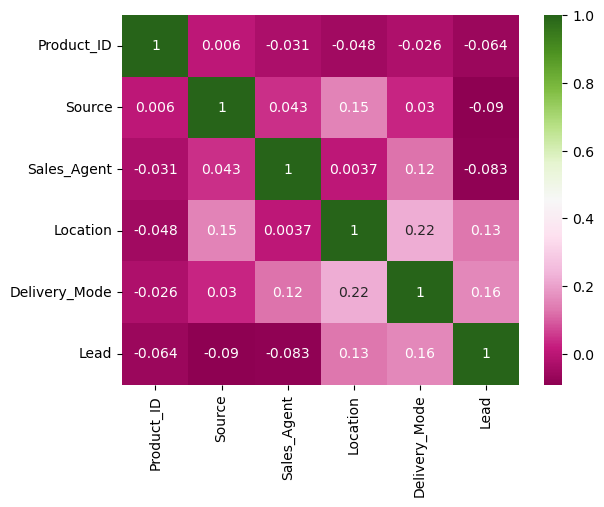

In [162]:
sns.heatmap(data1.corr(),annot=True,cmap="PiYG",annot_kws={"size":10})
plt.show()

 * **It appears that there are no highly correlated features present. Therefore,no need to drop any feature based on correlation.**

### Saving preprocessed data

In [165]:
data1.to_csv('Preprocessdata.csv', index=False)
df = pd.read_csv("Preprocessdata.csv")
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Lead
0,9,0,2,4,3,0
1,19,1,3,5,4,0
2,18,2,10,3,3,0
3,15,2,6,3,3,1
4,18,1,6,4,3,0


### Standard scaling 

In [167]:
print(df.dtypes)

Product_ID       int64
Source           int64
Sales_Agent      int64
Location         int64
Delivery_Mode    int64
Lead             int64
dtype: object


In [168]:
print(df.describe())

        Product_ID       Source  Sales_Agent     Location  Delivery_Mode  \
count  7364.000000  7364.000000  7364.000000  7364.000000    7364.000000   
mean     15.947311     1.086095     5.556491     3.745926       3.130364   
std       6.072937     1.163026     3.134486     1.189137       0.829221   
min       0.000000     0.000000     1.000000     0.000000       0.000000   
25%      12.000000     0.000000     3.000000     3.000000       3.000000   
50%      18.000000     1.000000     4.000000     4.000000       3.000000   
75%      19.000000     2.000000     8.000000     5.000000       4.000000   
max      28.000000     6.000000    11.000000     5.000000       4.000000   

              Lead  
count  7364.000000  
mean      0.700978  
std       0.457861  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


In [169]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Columns:", numeric_cols)

Numeric Columns: ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Lead']


### Use standard scaler to scale data for distance based models 

In [171]:
scaler = StandardScaler()
numeric_cols = ['Product_ID','Source','Sales_Agent','Location','Delivery_Mode']
# Apply StandardScaler
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [172]:
print(df.head())  # Check if 'Product_ID' values are scaled properly

   Product_ID    Source  Sales_Agent  Location  Delivery_Mode  Lead
0   -1.144057 -0.933915    -1.134710  0.213677      -0.157223     0
1    0.502705 -0.074031    -0.815657  1.054680       1.048810     0
2    0.338029  0.785853     1.417716 -0.627326      -0.157223     0
3   -0.156000  0.785853     0.141503 -0.627326      -0.157223     1
4    0.338029 -0.074031     0.141503  0.213677      -0.157223     0


### Model Creation and Evaluation

In [174]:
x = df.drop(columns=["Lead"])
y = df["Lead"]
x.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,-1.144057,-0.933915,-1.134710,0.213677,-0.157223
1,0.502705,-0.074031,-0.815657,1.054680,1.048810
2,0.338029,0.785853,1.417716,-0.627326,-0.157223
3,-0.156000,0.785853,0.141503,-0.627326,-0.157223
4,0.338029,-0.074031,0.141503,0.213677,-0.157223


In [175]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Lead, dtype: int64

In [176]:
type(y)

pandas.core.series.Series

In [177]:
type(x)

pandas.core.frame.DataFrame

### Train Test Split

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [180]:
x_train.shape

(5891, 5)

In [181]:
x_test.shape

(1473, 5)

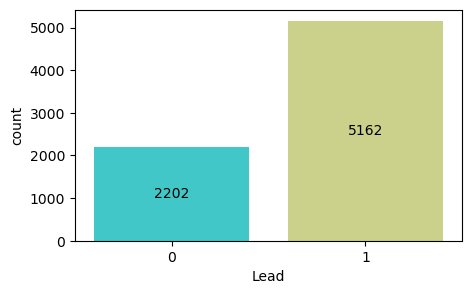

In [182]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x=df["Lead"], palette="rainbow")
for p in ax.containers:
    ax.bar_label(p, label_type='center', color='black', fontsize=10)
plt.show()

* **The Target values are not balanced**

**Use SMOTE to get the data balanced**

In [185]:
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)
print("Actual class",Counter(y_train))
print("Smote class",Counter(y_smote))

Actual class Counter({1: 4129, 0: 1762})
Smote class Counter({0: 4129, 1: 4129})


## Model Building

### Logistic regression

In [188]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}\n")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.10      0.17       440
           1       0.72      0.97      0.83      1033

    accuracy                           0.71      1473
   macro avg       0.66      0.54      0.50      1473
weighted avg       0.68      0.71      0.63      1473

Accuracy: 0.7115



### Decision Tree Classifier

In [190]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}\n")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       440
           1       0.80      0.81      0.81      1033

    accuracy                           0.72      1473
   macro avg       0.67      0.67      0.67      1473
weighted avg       0.72      0.72      0.72      1473

Accuracy: 0.7244



### Random Forest Classifier

In [192]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.47      0.52       440
           1       0.79      0.85      0.82      1033

    accuracy                           0.74      1473
   macro avg       0.68      0.66      0.67      1473
weighted avg       0.73      0.74      0.73      1473

Accuracy: 0.7379



### Gradient Boosting Classifier

In [194]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

# Classification Report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}\n")

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.34      0.46       440
           1       0.77      0.95      0.85      1033

    accuracy                           0.77      1473
   macro avg       0.76      0.64      0.66      1473
weighted avg       0.76      0.77      0.73      1473

Accuracy: 0.7665



###  XGBoost Classifier

In [196]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}\n")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51       440
           1       0.79      0.88      0.83      1033

    accuracy                           0.75      1473
   macro avg       0.70      0.66      0.67      1473
weighted avg       0.73      0.75      0.74      1473

Accuracy: 0.7495



###  K-Nearest Neighbors (KNN)

In [198]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Classification Report
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}\n")

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       440
           1       0.77      0.84      0.81      1033

    accuracy                           0.72      1473
   macro avg       0.65      0.63      0.64      1473
weighted avg       0.70      0.72      0.71      1473

Accuracy: 0.7169



### Bagging Classifier

In [200]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

# classification report
print("Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_bagging))
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}\n")

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.48      0.53       440
           1       0.79      0.85      0.82      1033

    accuracy                           0.74      1473
   macro avg       0.69      0.67      0.67      1473
weighted avg       0.73      0.74      0.73      1473

Accuracy: 0.7413



### Artificial Neural Network (ANN)

In [202]:
#Neural Network
ann = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary Classification
])
# Compile Model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train Model
ann.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)
# Predictions
y_pred_ann = (ann.predict(x_test) > 0.5).astype(int)

# Classification Report
print("Artificial Neural Network Classification Report:")
print(classification_report(y_test, y_pred_ann))
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann):.4f}\n")

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7021 - loss: 0.5911 - val_accuracy: 0.7155 - val_loss: 0.5517
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.5569 - val_accuracy: 0.7135 - val_loss: 0.5439
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: 0.5563 - val_accuracy: 0.7142 - val_loss: 0.5379
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7280 - loss: 0.5361 - val_accuracy: 0.7257 - val_loss: 0.5343
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7282 - loss: 0.5409 - val_accuracy: 0.7183 - val_loss: 0.5288
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7282 - loss: 0.5437 - val_accuracy: 0.7237 - val_loss: 0.5268
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7381 - loss: 0.5276 - val_accuracy: 0.7244 - val_loss: 0.5271
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.5381 - val_accuracy: 0.

### Comparison Report

In [204]:
from sklearn.metrics import accuracy_score, classification_report
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}
model_results = {} # Store results
# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Get precision, recall, F1-score
    # Store results in dictionary
    model_results[name] = {
        "Accuracy": round(accuracy, 4),
        "Precision (Macro Avg)": round(report["macro avg"]["precision"], 4),
        "Recall (Macro Avg)": round(report["macro avg"]["recall"], 4),
        "F1-Score (Macro Avg)": round(report["macro avg"]["f1-score"], 4)
    }
# Convert results into a DataFrame
results_df = pd.DataFrame(model_results).T 
print("\nOverall Model Comparison Report:")
print(results_df)


Overall Model Comparison Report:
                     Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
Logistic Regression    0.7115                 0.6612              0.5353   
Decision Tree          0.7244                 0.6693              0.6652   
Random Forest          0.7379                 0.6829              0.6618   
Gradient Boosting      0.7665                 0.7553              0.6430   
XGBoost                0.7495                 0.6997              0.6603   
K-Nearest Neighbors    0.7169                 0.6536              0.6331   
Bagging Classifier     0.7413                 0.6875              0.6669   

                     F1-Score (Macro Avg)  
Logistic Regression                0.4969  
Decision Tree                      0.6671  
Random Forest                      0.6693  
Gradient Boosting                  0.6567  
XGBoost                            0.6714  
K-Nearest Neighbors                0.6397  
Bagging Classifier                 0.6744  


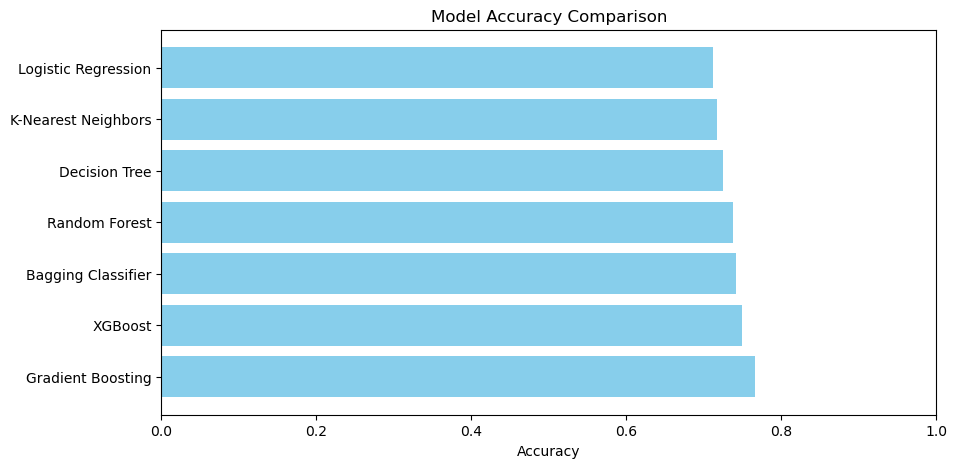

In [205]:
# Sort models by accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.barh(results_df.index, results_df["Accuracy"], color="skyblue")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1) 
plt.show()

### Hyperparametric Tuning for better Accuracy

### Tuning of Gradient Boost Classifier

In [208]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size at each iteration
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples to split a node
}
# Initialize the model
gb = GradientBoostingClassifier(random_state=42)
# Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
# Train the best model
best_gb = GradientBoostingClassifier(**best_params, random_state=42)
best_gb.fit(x_train, y_train)
# Predict on test data
y_pred_best_gb = best_gb.predict(x_test)

# Evaluate Performance
print("Optimized Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_best_gb))
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best_gb):.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.36      0.47       440
           1       0.77      0.93      0.84      1033

    accuracy                           0.76      1473
   macro avg       0.73      0.65      0.66      1473
weighted avg       0.75      0.76      0.73      1473

Optimized Accuracy: 0.7604


### Tuning of XG Boost

In [210]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],  
    'min_child_weight': [1, 3, 5],  
    'gamma': [0, 0.1, 0.2]  
}
# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Grid Search with 5-Fold Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(x_train, y_train)
# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")
# Train the best model
best_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(x_train, y_train)
# Predict on test data
y_pred_best_xgb = best_xgb.predict(x_test)

# Evaluate Performance
print("Optimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best_xgb):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters for XGBoost: {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200}
Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.40      0.50       440
           1       0.78      0.91      0.84      1033

    accuracy                           0.76      1473
   macro avg       0.72      0.66      0.67      1473
weighted avg       0.74      0.76      0.74      1473

Optimized Accuracy: 0.7590


### Tuning Decision Tree

In [212]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']
}
# Grid Search
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train, y_train)
# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")
# Train best model
best_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt.fit(x_train, y_train)
y_pred_best_dt = best_dt.predict(x_test)

# Evaluate Performance
print("Optimized Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dt))
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best_dt):.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52       440
           1       0.79      0.87      0.83      1033

    accuracy                           0.75      1473
   macro avg       0.69      0.66      0.67      1473
weighted avg       0.73      0.75      0.74      1473

Optimized Accuracy: 0.7461


### Tuning Random Forest

In [214]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]
}
# Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train, y_train)
# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")
# Train best model
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(x_train, y_train)
y_pred_best_rf = best_rf.predict(x_test)

# Evaluate Performance
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.35      0.47       440
           1       0.77      0.93      0.84      1033

    accuracy                           0.76      1473
   macro avg       0.73      0.64      0.66      1473
weighted avg       0.75      0.76      0.73      1473

Optimized Accuracy: 0.7590


### Tuning K-Nearest Neighbors (KNN)

In [216]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
# Grid Search
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_knn.fit(x_train, y_train)
# Get the best parameters
best_params_knn = grid_search_knn.best_params_
print(f"Best Hyperparameters for KNN: {best_params_knn}")
# Train best model
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(x_train, y_train)
y_pred_best_knn = best_knn.predict(x_test)

# Evaluate Performance
print("Optimized KNN Classification Report:")
print(classification_report(y_test, y_pred_best_knn))
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best_knn):.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Optimized KNN Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       440
           1       0.78      0.85      0.81      1033

    accuracy                           0.72      1473
   macro avg       0.66      0.64      0.65      1473
weighted avg       0.71      0.72      0.71      1473

Optimized Accuracy: 0.7244


### Tuning Bagging Classifier

In [218]:
param_grid_bagging = {
    'n_estimators': [50, 100, 200],  
    'max_samples': [0.5, 0.7, 1.0],  
    'bootstrap': [True, False]
}
# Grid Search
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
grid_search_bagging = GridSearchCV(estimator=bagging, param_grid=param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_bagging.fit(x_train, y_train)
# Get the best parameters
best_params_bagging = grid_search_bagging.best_params_
print(f"Best Hyperparameters for Bagging Classifier: {best_params_bagging}")
# Train best model
best_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), **best_params_bagging, random_state=42)
best_bagging.fit(x_train, y_train)
y_pred_best_bagging = best_bagging.predict(x_test)

# Evaluate Performance
print("Optimized Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_best_bagging))
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best_bagging):.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters for Bagging Classifier: {'bootstrap': True, 'max_samples': 0.5, 'n_estimators': 200}
Optimized Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54       440
           1       0.80      0.87      0.83      1033

    accuracy                           0.75      1473
   macro avg       0.70      0.67      0.68      1473
weighted avg       0.74      0.75      0.74      1473

Optimized Accuracy: 0.7515


### Tuning Artificial Neural Network (ANN)

In [220]:
# Build Neural Network
def create_ann(learning_rate=0.001):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model
# Grid Search for ANN
ann = KerasClassifier(model=create_ann, epochs=10, batch_size=32, verbose=0)
param_grid_ann = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30]
}
grid_search_ann = GridSearchCV(estimator=ann, param_grid=param_grid_ann, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_ann.fit(x_train, y_train)
# Get the best parameters
best_params_ann = grid_search_ann.best_params_
print(f"Best Hyperparameters for ANN: {best_params_ann}")
# Train the best ANN model
best_ann = create_ann(learning_rate=best_params_ann['model__learning_rate'])
best_ann.fit(x_train, y_train, epochs=best_params_ann['epochs'], batch_size=best_params_ann['batch_size'], verbose=1)
# Predict on test data
y_pred_best_ann = (best_ann.predict(x_test) > 0.5).astype(int)

# Evaluate Performance
print("Optimized ANN Classification Report:")
print(classification_report(y_test, y_pred_best_ann))
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best_ann):.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters for ANN: {'batch_size': 32, 'epochs': 20, 'model__learning_rate': 0.01}
Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7034 - loss: 0.5697
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7089 - loss: 0.5523
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7170 - loss: 0.5467
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5287
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7220 - loss: 0.5354
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7344 - loss: 0.5244
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7405 - loss: 0.5159
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss: 0.5136
Epoch 9/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.5174
Epoch 10/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7396 

In [221]:
before_tuning = {}
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
before_tuning["Logistic Regression"] = accuracy_score(y_test, y_pred_log)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
before_tuning["Decision Tree"] = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
before_tuning["Random Forest"] = accuracy_score(y_test, y_pred_rf)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
before_tuning["Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
before_tuning["XGBoost"] = accuracy_score(y_test, y_pred_xgb)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
before_tuning["KNN"] = accuracy_score(y_test, y_pred_knn)

# Bagging Classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)
before_tuning["Bagging Classifier"] = accuracy_score(y_test, y_pred_bagging)

# ANN (Artificial Neural Network)
ann = create_ann()
ann.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_ann = (ann.predict(x_test) > 0.5).astype(int)
before_tuning["ANN"] = accuracy_score(y_test, y_pred_ann)

print("\n📊 Accuracy Before Hyperparameter Tuning:")
print(before_tuning)

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6456 - loss: 0.6180
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7136 - loss: 0.5591
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 0.5408
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7289 - loss: 0.5359
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7191 - loss: 0.5390
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7328 - loss: 0.5303
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7419 - loss: 0.5238
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.5237
Epoch 9/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5223
Epoch 10/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7452 - loss: 0.5155
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Accuracy Before Hyperparameter Tuning:
{'Logistic Regression': 0.7114731839782756, 'Decision Tree

In [222]:
after_tuning = {}

# Decision Tree (After Tuning)
after_tuning["Decision Tree"] = accuracy_score(y_test, y_pred_best_dt)

# Random Forest (After Tuning)
after_tuning["Random Forest"] = accuracy_score(y_test, y_pred_best_rf)

# Gradient Boosting (After Tuning)
after_tuning["Gradient Boosting"] = accuracy_score(y_test, y_pred_best_gb)

# XGBoost (After Tuning)
after_tuning["XGBoost"] = accuracy_score(y_test, y_pred_best_xgb)

# K-Nearest Neighbors (KNN) (After Tuning)
after_tuning["KNN"] = accuracy_score(y_test, y_pred_best_knn)

# Bagging Classifier (After Tuning)
after_tuning["Bagging Classifier"] = accuracy_score(y_test, y_pred_best_bagging)

# ANN (Artificial Neural Network) (After Tuning)
after_tuning["ANN"] = accuracy_score(y_test, y_pred_best_ann)

print("\n📊 Accuracy After Hyperparameter Tuning:")
print(after_tuning)


📊 Accuracy After Hyperparameter Tuning:
{'Decision Tree': 0.7460964019008826, 'Random Forest': 0.7589952477936185, 'Gradient Boosting': 0.7603530210454854, 'XGBoost': 0.7589952477936185, 'KNN': 0.7243720298710116, 'Bagging Classifier': 0.7515274949083504, 'ANN': 0.7413441955193483}


In [223]:
# Convert results to DataFrame
results_df = pd.DataFrame({"Before Tuning (%)": before_tuning, "After Tuning (%)": after_tuning})

# Calculate Accuracy Change
results_df["Change (%)"] = (results_df["After Tuning (%)"] - results_df["Before Tuning (%)"]) * 100

# Display Results
print("\n📊 Before & After Hyperparameter Tuning Comparison:")
print(results_df)


📊 Before & After Hyperparameter Tuning Comparison:
                     Before Tuning (%)  After Tuning (%)  Change (%)
Logistic Regression           0.711473               NaN         NaN
Decision Tree                 0.724372          0.746096    2.172437
Random Forest                 0.737950          0.758995    2.104549
Gradient Boosting             0.766463          0.760353   -0.610998
XGBoost                       0.749491          0.758995    0.950441
KNN                           0.716904          0.724372    0.746775
Bagging Classifier            0.741344          0.751527    1.018330
ANN                           0.731840          0.741344    0.950441


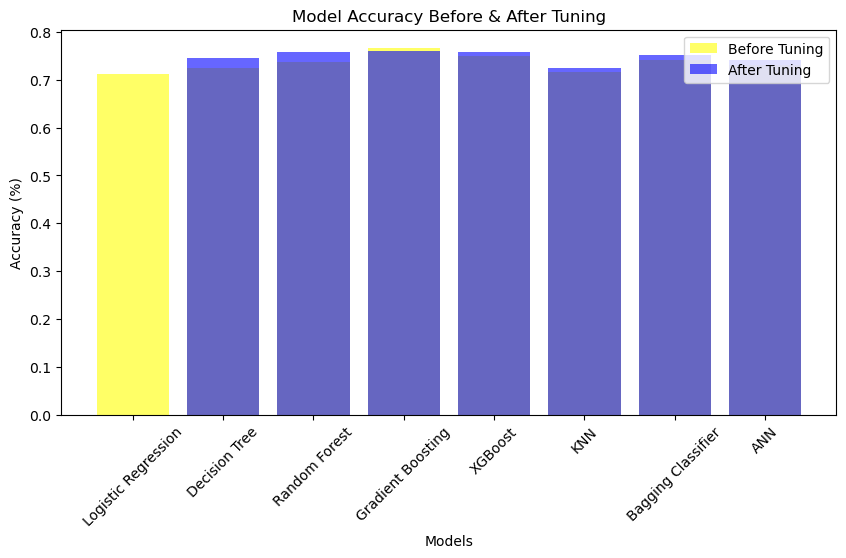

In [224]:
# Plot Before vs After Accuracy
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df["Before Tuning (%)"], label="Before Tuning", color='yellow', alpha=0.6)
plt.bar(results_df.index, results_df["After Tuning (%)"], label="After Tuning", color='blue', alpha=0.6)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Before & After Tuning")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Saving Model

In [226]:
import pickle
# Save the trained Gradient Boosting model
with open("gradient_boosting_model.pkl", "wb") as file:
    pickle.dump(gb, file)
print("Model saved successfully!")

Model saved successfully!


### Loading Saved Model

In [228]:
import pickle

# Load the saved Gradient Boosting model
with open("gradient_boosting_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully!")

Model loaded successfully!


### Testing model

In [230]:
# Make predictions
y_pred = loaded_model.predict(x_test)
print("Gradient Boosting Model Test Results:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Gradient Boosting Model Test Results:
              precision    recall  f1-score   support

           0       0.74      0.34      0.46       440
           1       0.77      0.95      0.85      1033

    accuracy                           0.77      1473
   macro avg       0.76      0.64      0.66      1473
weighted avg       0.76      0.77      0.73      1473

Accuracy: 0.7665


#### The final trained Gradient Boosting model was saved as a pickle file for future use and deployment.

### **INSIGHTS**

* **Lead Source** – Certain marketing channels had higher conversion rates.
* **Customer Response Time** – Faster responses correlated with higher conversions.
* **Number of Follow-ups** – More follow-ups increased conversion likelihood.
* **Lead Score** – A numerical scoring system helped in prioritizing leads.
* **Product Interest** – Customers who showed interest in specific products had higher conversion rates.

## Conclusion

* Gradient Boosting was selected as the best model due to its highest accuracy **(76.65%)** and balanced performance.
* Hyperparameter tuning helped improve model performance, particularly in Decision Tree, Random Forest, and ANN.
* The model is now ready for deployment, and further improvements can be explored using techniques such as ensemble learning or deep learning approaches.
    This project aimed to improve sales lead conversion using machine learning. By analyzing sales data, we built models to predict which leads are most likely to convert. Among all models tested, Gradient Boosting performed the best, making it the ideal choice for lead classification.
Hyperparameter tuning helped improve accuracy, showing that optimizing machine learning models is essential for better performance. The insights from our model can help businesses focus on high-potential leads, improve sales strategies, and allocate resources efficiently.

    For practical use, this model can be integrated into CRM systems or automated lead-scoring tools. Regular updates and retraining will ensure it remains effective as customer behavior changes. Overall, this project highlights how data-driven approaches can boost sales performance, increase conversions, and drive business growth.

## Challenges Faced

* **Data Quality Issues** – The dataset contained missing values, inconsistencies, and imbalanced classes, which required extensive preprocessing.
* **Feature Selection** – Identifying the most relevant features for predicting lead conversion was challenging and required careful analysis.
* **Model Overfitting** – Some models, especially complex ones like Random Forest and XGBoost, initially overfitted the training data, requiring regularization and tuning.
* **Hyperparameter Tuning Complexity** – Finding the best parameters for models like Gradient Boosting and XGBoost was computationally expensive and time-consuming.
* **Class Imbalance** – Some categories in the ‘Status’ column, such as ‘Converted’ vs. ‘Junk Lead,’ were imbalanced, affecting prediction accuracy.